In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [432]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/ITC.csv")

In [433]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN


In [434]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [435]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,420.359141,420.631511,426.629061,414.241538,420.250207,420.273690,420.522927,7.173165e+06,1.799399e+14,94563.757736,4.571758e+06,0.591634
std,328.167744,328.240059,333.333043,323.333442,328.107927,328.165405,328.435808,9.613497e+06,2.155242e+14,59571.722457,5.040517e+06,0.128273
min,115.450000,115.000000,116.200000,114.400000,115.500000,115.450000,115.390000,6.797000e+03,5.340132e+11,1425.000000,6.120000e+03,0.098000
25%,201.650000,202.000000,204.500000,198.500000,201.500000,201.650000,201.705000,1.038020e+06,5.423007e+13,56465.250000,1.614865e+06,0.515700
50%,280.050000,280.200000,283.000000,277.025000,279.900000,280.025000,280.055000,5.122630e+06,1.222452e+14,80494.500000,3.569193e+06,0.611650
75%,631.875000,630.975000,640.000000,623.500000,631.150000,631.362500,631.727500,8.788539e+06,2.315038e+14,113228.000000,6.023117e+06,0.685625
max,1940.100000,1946.000000,1964.800000,1916.300000,1940.000000,1940.100000,1933.790000,1.494797e+08,4.254992e+15,667965.000000,8.629348e+07,0.997300


In [436]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [437]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [438]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [439]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [440]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [441]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [442]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,1.001466,-0.242954,205.3,19886214,NaN
5302,0.926603,0.048709,205.4,11444814,NaN
5303,0.584510,-0.242718,205.5,12708021,NaN
5304,1.715266,-1.352004,204.3,13096755,NaN
5305,1.831683,-0.637567,202.6,16495657,NaN


In [443]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [444]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [445]:
#Define the prediction model
model = RandomForestRegressor()

In [446]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [447]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9264714034444184


In [448]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [449]:
predictions = model.predict(X_Check)

In [450]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

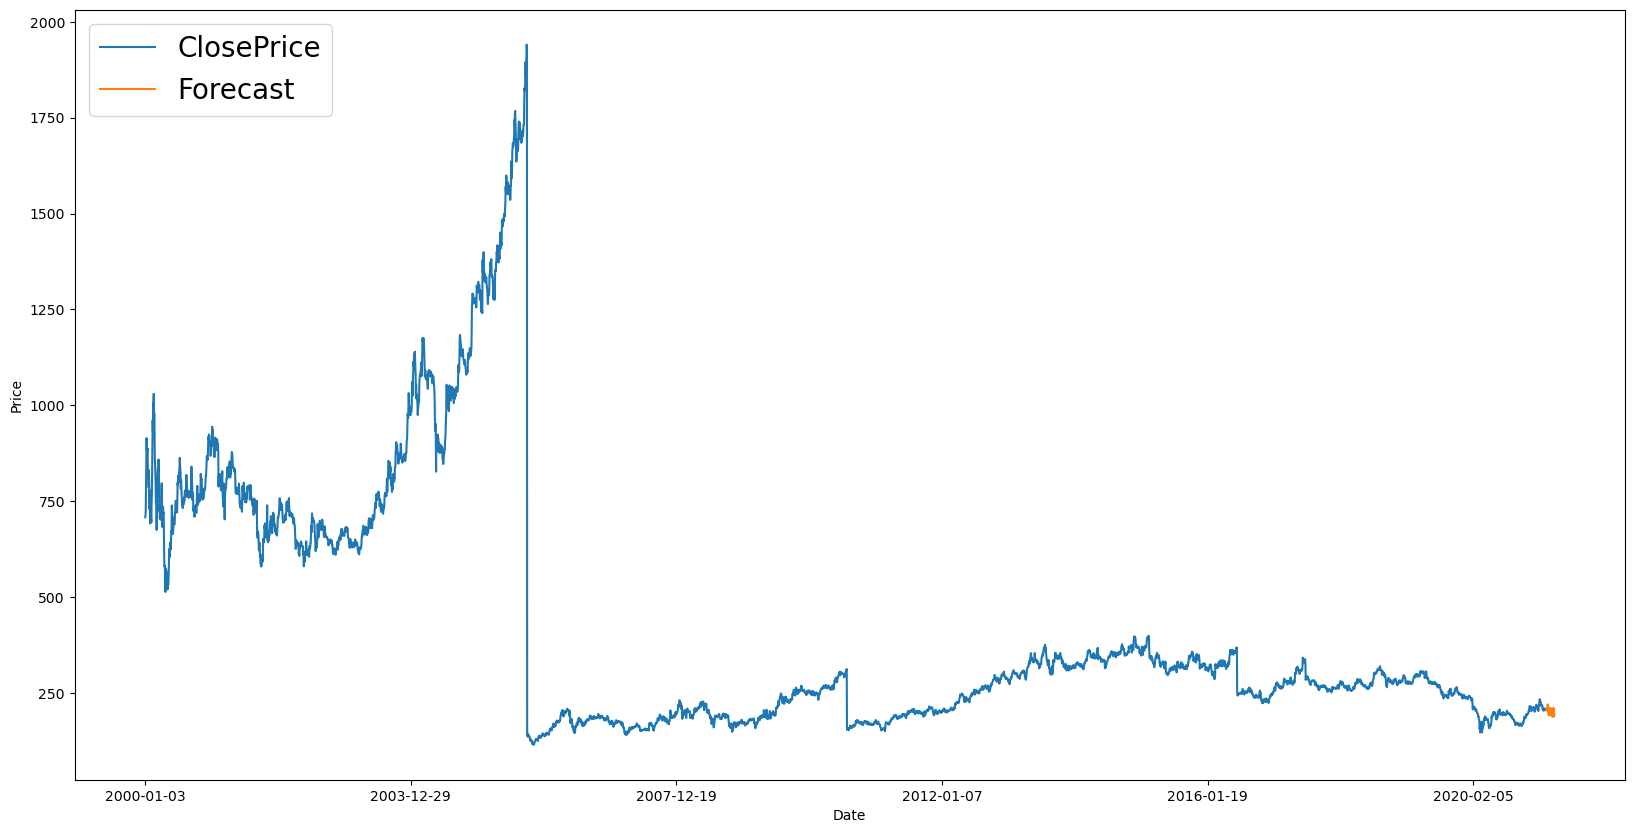

In [451]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')